In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
## Read Titanic data set

In [3]:
train = pd.read_csv('train_titanic.csv')
train.head()

#There are a few others similar data sets:

#test_features_titanic.csv
#test_target_titanic.csv
#titanic_full.csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check the number of missing values

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Calculate %age of missing data

In [6]:
pct_missing_data = round(((train.isnull().sum()/train.isnull().count()))*100,1)
pct_missing_data

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

## Visualise missing data using heat map

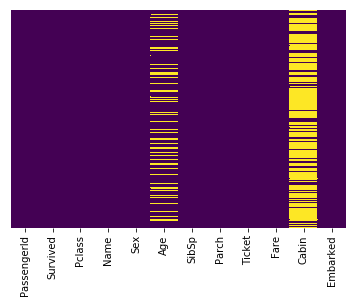

In [7]:
sns.heatmap(data = train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## How many survivors male/female vise?

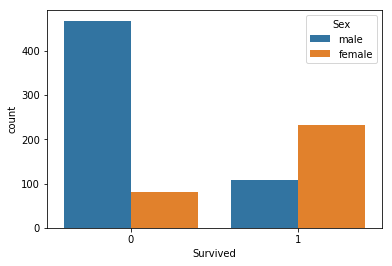

In [8]:
sns.countplot(x='Survived', hue = 'Sex', data = train)

In [9]:
train['Pclass'].unique()

array([3, 1, 2])

## How many survivors based on passenger class

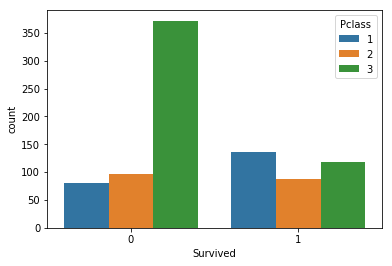

In [10]:
sns.countplot(x='Survived', hue = 'Pclass', data = train)

## Survivors based on embarkation

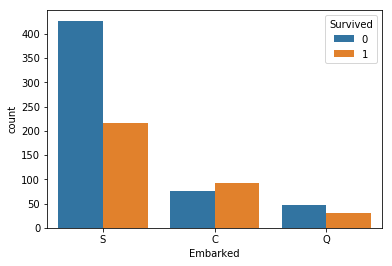

In [11]:
sns.countplot(x='Embarked', hue = 'Survived', data = train)

In [12]:
## Survivors based on embarkation by passenger class

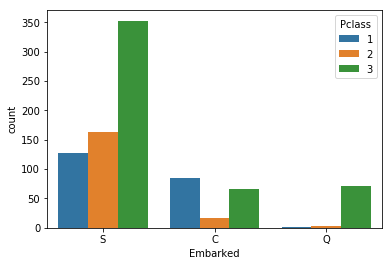

In [13]:
sns.countplot(x='Embarked', hue = 'Pclass', data = train)

## Parent/Children rate survival 


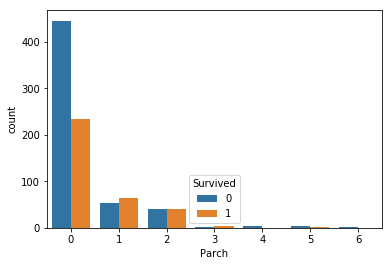

In [14]:
sns.countplot(x = 'Parch', hue = 'Survived', data = train )

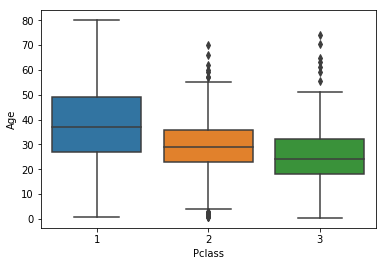

In [15]:
sns.boxplot(x = 'Pclass', y = 'Age', data=train)

In [16]:
train[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


## Create a custom function to replace missing age values

In [17]:
def impute_age(age_pclass):
    age = age_pclass[0]
    pclass = age_pclass[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age
    

## Apply custom function and check the data

In [18]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

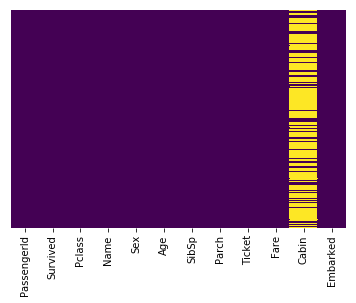

In [19]:
sns.heatmap(data = train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Drop cabin data too many value are missing!

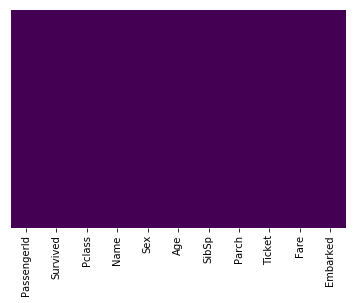

In [20]:
train.drop('Cabin', axis = 1, inplace = True)
sns.heatmap(data = train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

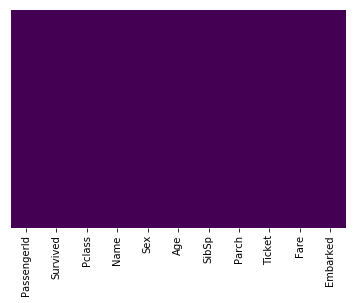

In [21]:
train.dropna(inplace = True)
sns.heatmap(data = train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [22]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex.head()


,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()
#we can also run dummies for pclass as well

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
train = pd.concat([train, sex, embark], axis = 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,1,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,0,0,0


In [25]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
train.drop('PassengerId', axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.33, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
LR = LogisticRegression()

In [32]:
LR.fit(X_train, y_train)

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
pred = LR.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       184
           1       0.76      0.71      0.73       110

   micro avg       0.81      0.81      0.81       294
   macro avg       0.79      0.79      0.79       294
weighted avg       0.80      0.81      0.80       294



In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[159,  25],
       [ 32,  78]])